<a href="https://www.kaggle.com/code/niteshk97/logistic-regression-hyperparameter-tunning?scriptVersionId=133085874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
# Calculate the correlation matrix of the DataFrame
df.corr()

/tmp/ipykernel_20/3480736194.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_20/1914679538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


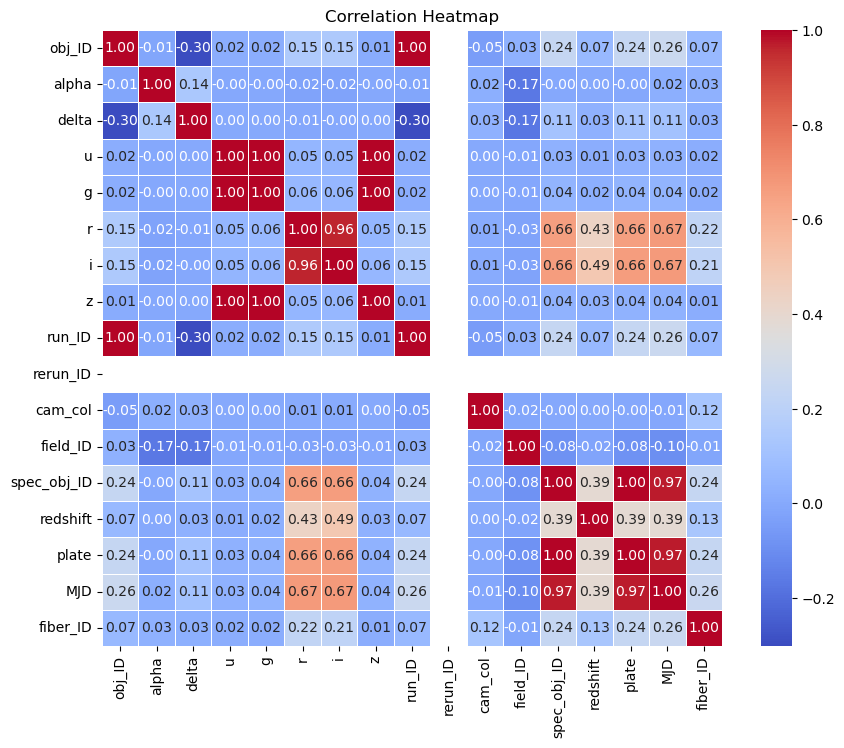

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()
# Generate the heatmap using seaborn's heatmap function
# Set annot=True to display the correlation values on the heatmap
# Set cmap='coolwarm' to use a cool-warm color palette
# Set fmt=".2f" to format the correlation values as floats with two decimal places
# Set linewidths=0.5 to add a border around each cell in the heatmap

In [8]:
df.drop(columns=['rerun_ID','obj_ID'],inplace=True,axis=1)

/tmp/ipykernel_20/914096856.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


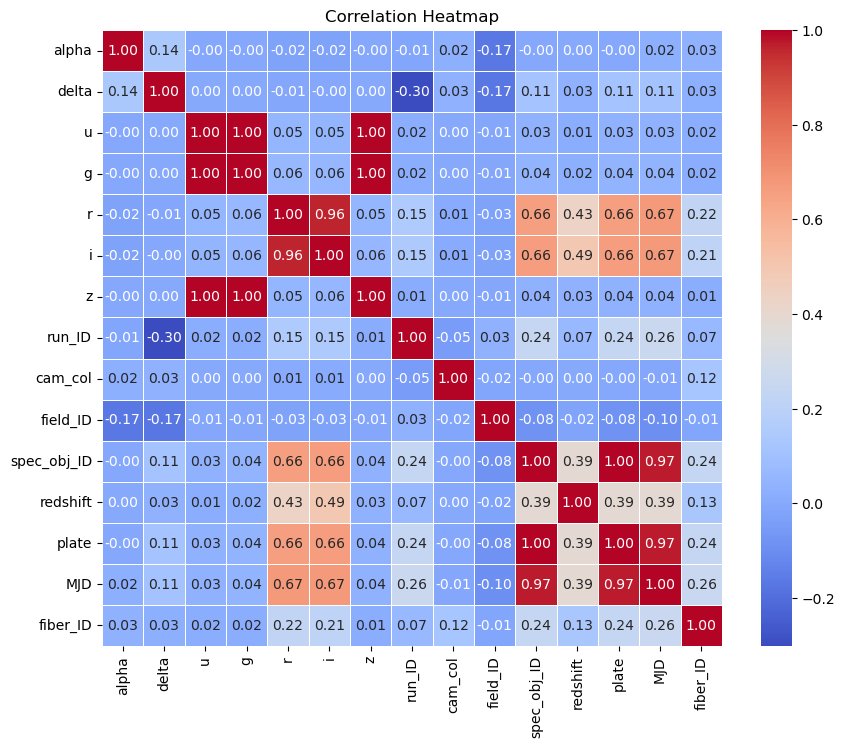

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   alpha        100000 non-null  float64
 1   delta        100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   run_ID       100000 non-null  int64  
 8   cam_col      100000 non-null  int64  
 9   field_ID     100000 non-null  int64  
 10  spec_obj_ID  100000 non-null  float64
 11  class        100000 non-null  object 
 12  redshift     100000 non-null  float64
 13  plate        100000 non-null  int64  
 14  MJD          100000 non-null  int64  
 15  fiber_ID     100000 non-null  int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 12.2+ MB


In [11]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [12]:
# Assigning a new value to the 'class' column
df['class']=df['class'].map({'GALAXY':1,'STAR':0,'QSO':2})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   alpha        100000 non-null  float64
 1   delta        100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   run_ID       100000 non-null  int64  
 8   cam_col      100000 non-null  int64  
 9   field_ID     100000 non-null  int64  
 10  spec_obj_ID  100000 non-null  float64
 11  class        100000 non-null  int64  
 12  redshift     100000 non-null  float64
 13  plate        100000 non-null  int64  
 14  MJD          100000 non-null  int64  
 15  fiber_ID     100000 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 12.2 MB


In [14]:
X=df.drop(columns=['class'])
y=df['class']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test
                              )

In [18]:
print(len(X_train_scaler))

70000


In [19]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV()

In [20]:
clf.fit(X_train_scaler,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV()

In [21]:
y_pred=clf.predict(X_test_scaler)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred.shape

(30000,)

In [24]:
accuracy_get=accuracy_score(y_test,y_pred)
print(accuracy_get*100)

96.13000000000001


In [25]:
from sklearn.linear_model import LogisticRegressionCV
cvl=LogisticRegressionCV()
clv=LogisticRegressionCV(cv=5, scoring='accuracy', random_state=0, 
                         n_jobs=-1, verbose=3,
                         max_iter=300,
                         multi_class='multinomial').fit(X_train_scaler,
                                                        y_train)
     

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           48     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15223D+04    |proj g|=  1.66171D+04


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -1.3643D+09  1.3643D+09
Distance to the stationary point =   1.0000D+00

---------------- exit CAUCHY----------------------

          48  variables are free at GCP            1
 LINE SEARCH           0  times; norm of step =    1.0000000000000000     

At iterate    1    f=  5.05573D+04    |proj g|=  1.14316D+04


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           48     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    1.0000000000000000     

At iterate    1    f=  5.05521D+04    |proj g|=  1.14353D+04


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.2056586541510335E-002

At iterate    8    f=  3.98001D+04    |proj g|=  1.34803D+02


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.3993945436780715E-002

At iterate   10    f=  3.97617D+04    |proj g|=  3.41358D+01


ITERATION    11

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.1906827040410608E-002

At iterate    7    f=  3.97381D+04    |proj g|=  3.26427D+02


ITERATION     8

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           48     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50264D+04    |proj g|=  5.27336D+03


ITERATION     1
 LINE SEARCH           0  times; norm of step =    5.4514122064937713E-002

At iterate    4    f=  2.99251D+04    |proj g|=  1.42368D+03


ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -8.1772D+07  8.1772D+07
Distance to the stationary point =   1.0000D+00

---------------- exit CAUCHY----------------------

          48  variables are free at GCP            1
 LINE SEARCH           0  times; norm of step =    5.2197786078118421E-003

At iterate   11    f=  3.97620D+04    |proj g|=  1.26572D+01


ITERATION    12

--------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.34228616065352568     

At iterate    2    f=  2.26538D+04    |proj g|=  2.12144D+03


ITERATION     3

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.4015973827054879E-004

At iterate   24    f=  2.87736D+04    |proj g|=  7.12494D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   48     24     26      1     0     0   7.125D-01   2.877D+04

 X = -5.5150D-02  2.4793D-03  5.2671D-02 -6.1949D-02 -4.0081D-02  1.0203D-0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.23019861843648071     

At iterate    4    f=  1.59222D+04    |proj g|=  1.12734D+03


ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    2.1821422009105714E-004

At iterate   44    f=  1.95999D+04    |proj g|=  4.49400D-01


ITERATION    45

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.3102096191202706E-004

At iterate   47    f=  1.95659D+04    |proj g|=  2.32103D-01


ITERATION    48

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.39534330875907742     

At iterate    5    f=  1.57638D+04    |proj g|=  1.08937D+03


ITERATION     6

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           1  times; norm of step =    5.2478261466442754E-004

At iterate   83    f=  1.36800D+04    |proj g|=  3.06450D-01


ITERATION    84

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.56530298095653375     

At iterate    5    f=  1.15446D+04    |proj g|=  2.87654D+02


ITERATION     6

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.9103797822900841     

At iterate    7    f=  1.15307D+04    |proj g|=  5.78180D+02
 LINE SEARCH           0  times; norm of step =   0.54113181048523029     

At iterate    5    f=  1.16545D+04    |proj g|=  2.87935D+02


ITERATION     6

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------



ITERATION     8

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           1  times; norm of step =   0.23201480035292985     

At iterate   23    f=  1.02502D+04    |proj g|=  1.17323D+02


ITERATION    24

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.1444867205494369     

At iterate    8    f=  1.11604D+04    |proj g|=  2.42613D+02


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.39340759278254700     

At iterate   22    f=  1.03530D+04    |proj g|=  1.16335D+02


ITERATION    23

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.65113145866262656     

At iterate   24    f=  1.02427D+04    |proj g|=  1.47804D+02


ITERATION    25

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    5.1587602390598957E-004

At iterate   94    f=  1.02093D+04    |proj g|=  1.81528D-01


ITERATION    95

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.2747854799805275E-004

At iterate   80    f=  1.01639D+04    |proj g|=  7.21859D-01


ITERATION    81
 LINE SEARCH           0  times; norm of step =    4.0914247708469097E-002

At iterate    3    f=  8.99224D+03    |proj g|=  7.96794D+01


ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    5.9322384742423066E-002

At iterate    1    f=  9.18096D+03    |proj g|=  9.23905D+01


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.70473061720903751     

At iterate   29    f=  8.21038D+03    |proj g|=  4.60149D+01


ITERATION    30

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.2844802148240211     

At iterate   30    f=  8.38420D+03    |proj g|=  1.31337D+02


ITERATION    31

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.53177686972543070     

At iterate   23    f=  8.33715D+03    |proj g|=  5.15382D+01


ITERATION    24

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.28047792141196481     

At iterate    9    f=  8.96992D+03    |proj g|=  9.72167D+01


ITERATION    10

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    9.7559557992066986E-004

At iterate   92    f=  8.36513D+03    |proj g|=  2.18473D-01


ITERATION    93

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.23964079462512311     

At iterate    8    f=  7.61154D+03    |proj g|=  4.91229D+01


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    8.3188715367672021E-003

At iterate   71    f=  8.23588D+03    |proj g|=  1.47978D+00


ITERATION    72

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.0410235500027651E-004

At iterate   86    f=  8.26920D+03    |proj g|=  4.14880D-01


ITERATION    87

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    2.0652673424780339     

At iterate   18    f=  7.48255D+03    |proj g|=  8.23131D+01


ITERATION    19

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    8.2204331763515662E-003

At iterate    3    f=  7.78742D+03    |proj g|=  2.14959D+01


ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6149901652894538E-002

At iterate   80    f=  8.23585D+03    |proj g|=  1.09850D+00


ITERATION    81

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.5723304292673305E-002

At iterate    2    f=  7.69280D+03    |proj g|=  2.38312D+01


ITERATION     3

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.13469025540555768     

At iterate   63    f=  7.31516D+03    |proj g|=  2.71277D+00


ITERATION    64

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.68116271848587795     

At iterate    9    f=  7.65344D+03    |proj g|=  4.60052D+01


ITERATION    10

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6187373878292343E-002

At iterate   66    f=  7.40755D+03    |proj g|=  7.71082D-01


ITERATION    67

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.8487599491380654E-003

At iterate   80    f=  7.23809D+03    |proj g|=  3.95382D-01


ITERATION    81

----------------SUBSM entered----

 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    5.6097733821679147E-003

At iterate  124    f=  7.23803D+03    |proj g|=  6.97310D-01


ITERATION   125

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.4080180079953639E-004

At iterate  105    f=  7.31509D+03    |proj g|=  1.33642D-01


ITERATION   106

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.15366223729426706     

At iterate   54    f=  7.28925D+03    |proj g|=  8.41107D+00


ITERATION    55

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    8.4452683425694421E-003

At iterate    1    f=  7.13877D+03    |proj g|=  4.81499D+00


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    1.2649358095651114E-003

At iterate   83    f=  7.28913D+03    |proj g|=  2.31142D-01


ITERATION    84

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.6032635094130678     

At iterate   20    f=  7.02123D+03    |proj g|=  3.70294D+01


ITERATION    21

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    8.4772547495603999E-003

At iterate    1    f=  6.97079D+03    |proj g|=  4.67835D+00


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.5679986777672205E-003

At iterate   84    f=  7.28913D+03    |proj g|=  2.70061D-01


ITERATION    85

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.74368480713427876     

At iterate   19    f=  6.94654D+03    |proj g|=  4.79255D+01


ITERATION    20

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.5290666810484273E-002

At iterate    7    f=  7.02537D+03    |proj g|=  9.39106D+00


ITERATION     8

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.4120092315832977     

At iterate   45    f=  6.99738D+03    |proj g|=  7.85040D+01


ITERATION    46

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0562750549777749     

At iterate   39    f=  6.93042D+03    |proj g|=  7.73380D+01


ITERATION    40

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    1.2318778554722067E-003

At iterate   89    f=  6.88031D+03    |proj g|=  1.47802D-01


ITERATION    90

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.4714912617833158E-002

At iterate    8    f=  6.79179D+03    |proj g|=  2.04318D+00


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.6526808250970344E-002

At iterate  121    f=  6.98589D+03    |proj g|=  2.97796D-01


ITERATION   122

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.6184683349611417E-004

At iterate   92    f=  6.82095D+03    |proj g|=  2.20509D-01


ITERATION    93

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    1.9969120952835818E-003

At iterate    4    f=  6.71316D+03    |proj g|=  1.71027D+00


ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.5276482028458870E-002

At iterate  129    f=  6.98589D+03    |proj g|=  2.95775D-01


ITERATION   130

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.46847690994220020     

At iterate   16    f=  6.79118D+03    |proj g|=  7.29349D+00


ITERATION    17

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.9141126252855881E-003

At iterate   98    f=  6.88031D+03    |proj g|=  1.26405D-01


ITERATION    99

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.



At iterate   31    f=  6.69395D+03    |proj g|=  3.77957D+01


ITERATION    32

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.8370118519276448E-005

At iterate    2    f=  6.77608D+03    |proj g|=  7.92151D-01


ITERATION     3

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.1497877762960538E-003

At iterate  156    f=  6.98588D+03    |proj g|=  1.14181D-01


ITERATION   157

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.9669313960856289     

At iterate   44    f=  6.76063D+03    |proj g|=  4.98137D+01


ITERATION    45

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.907183

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    2.2442013488617829     
 LINE SEARCH           1  times; norm of step =    3.7405238441694406     

At iterate   39    f=  6.67972D+03    |proj g|=  3.68006D+01


ITERATION    40

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


At iterate   52    f=  6.74701D+03    |proj g|=  2.43289D+01


ITERATION    53

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.19278915316592757     

At iterate   12    f=  6.77597D+03    |proj g|=  5.52014D+00


ITERATION    13

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.5102940075175537     

At iterate   40    f=  6.67797D+03    |proj g|=  2.58668D+01


ITERATION    41

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.52641195010172492     

At iterate   70    f=  6.81639D+03    |proj g|=  5.95000D+00


ITERATION    71

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.4692684926747608E-002

At iterate   82    f=  6.72524D+03    |proj g|=  6.81976D-01


ITERATION    83

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.4359942925071119E-003

At iterate  109    f=  6.65837D+03    |proj g|=  5.89410D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    5.9437854332978803E-002

At iterate   88    f=  6.81605D+03    |proj g|=  6.42687D-01


ITERATION    89

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.4258264473481645E-003

At iterate   11    f=  3.97433D+04    |proj g|=  1.19472D+01


ITERATION    12

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.18417651906606475     

At iterate   99    f=  6.72522D+03    |proj g|=  3.29824D-01


ITERATION   100

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.6735537833487192E-002

At iterate   24    f=  6.70028D+03    |proj g|=  1.33181D+00


ITERATION    25

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    4.0806358401253510E-002

At iterate    8    f=  2.88063D+04    |proj g|=  3.22346D+02


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    5.0979290908291924E-003
 LINE SEARCH           1  times; norm of step =    2.7880667959486486E-003

At iterate  107    f=  6.72522D+03    |proj g|=  2.25266D-01


ITERATION   108

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

At iterate   96    f=  6.81604D+03    |proj g|=  4.58322D-01



ITERATION    97

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.14658647773029090     

At iterate   33    f=  6.70018D+03    |proj g|=  2.09692D+00


ITERATION    34

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.0s remaining:   28.4s
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    4.1944013556746663E-004

At iterate  115    f=  6.81604D+03    |proj g|=  8.74079D-02


ITERATION   116

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6438826284007668     

At iterate   50    f=  6.69952D+03    |proj g|=  8.62807D+00


ITERATION    51

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.17058500626151854     

At iterate    3    f=  2.21026D+04    |proj g|=  1.70440D+03


ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.9747476288373756E-004

At iterate  116    f=  6.81604D+03    |proj g|=  7.51228D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tn

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    4.1119595447032614E-002

At iterate   21    f=  1.96179D+04    |proj g|=  2.80330D+01


ITERATION    22

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.3249741020138845     

At iterate   59    f=  6.69693D+03    |proj g|=  1.60111D+01


ITERATION    60

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.1207104940056468E-003

At iterate    8    f=  6.77305D+03    |proj g|=  2.28248D-01


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.4072514671212706E-003

At iterate   22    f=  1.96175D+04    |proj g|=  1.48521D+01


ITERATION    23

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    3.4178804484914789     

At iterate   78    f=  6.68888D+03    |proj g|=  1.07225D+01


ITERATION    79

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.78891530467553628     

At iterate   11    f=  1.42375D+04    |proj g|=  3.87404D+02


ITERATION    12

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.10194872382327955     

At iterate   28    f=  6.77299D+03    |proj g|=  1.85317D+00


ITERATION    29

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.8327769933664224     

At iterate   79    f=  6.68872D+03    |proj g|=  6.24828D+00


ITERATION    80

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    1.9389587576212877     

At iterate   15    f=  1.04531D+04    |proj g|=  1.89668D+02


ITERATION    16

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6287399672585716     

At iterate   76    f=  6.75903D+03    |proj g|=  4.78892D+00


ITERATION    77

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.92758064330129175     

At iterate   16    f=  1.04034D+04    |proj g|=  2.02295D+02


ITERATION    17

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.9911465134293382     

At iterate   77    f=  6.75896D+03    |proj g|=  5.49092D+00


ITERATION    78

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.10487915718283507     

At iterate    9    f=  8.92155D+03    |proj g|=  1.11733D+02


ITERATION    10

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.22067443792660169     

At iterate   10    f=  8.90732D+03    |proj g|=  1.06308D+02


ITERATION    11

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.45006083159327903     

At iterate   11    f=  8.89173D+03    |proj g|=  1.33825D+02


ITERATION    12

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.96014093203583029     

At iterate   12    f=  8.86356D+03    |proj g|=  1.54846D+02


ITERATION    13

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    1.4748596412678787     

At iterate   18    f=  7.47520D+03    |proj g|=  8.15627D+01


ITERATION    19

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.2029333989225393     

At iterate   19    f=  7.45761D+03    |proj g|=  1.87646D+02


ITERATION    20

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.5342057982303263     

At iterate   20    f=  7.43066D+03    |proj g|=  1.69963D+02


ITERATION    21

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.82479196311160519     

At iterate   21    f=  7.41146D+03    |proj g|=  1.48430D+02


ITERATION    22

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    4.9220552798563541E-003

At iterate    4    f=  6.96064D+03    |proj g|=  5.33330D+00


ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.2613596273915631E-002

At iterate    5    f=  6.96062D+03    |proj g|=  5.94676D+00


ITERATION     6

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.0580418750305309E-002

At iterate    6    f=  6.96056D+03    |proj g|=  6.92690D+00


ITERATION     7

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.7169664254182989E-002

At iterate    7    f=  6.96045D+03    |proj g|=  8.53425D+00


ITERATION     8

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           1  times; norm of step =    1.5316783167639704E-003

At iterate    1    f=  6.70899D+03    |proj g|=  1.31915D+00


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.4073627942025996E-003

At iterate    2    f=  6.70899D+03    |proj g|=  9.82602D-01


ITERATION     3

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.5450780308794470E-004

At iterate    3    f=  6.70899D+03    |proj g|=  1.11203D+00


ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.9898220729375302E-003

At iterate    4    f=  6.70899D+03    |proj g|=  1.34346D+00


ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.



At iterate    3    f=  6.62188D+03    |proj g|=  2.88554D-01


ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.7674601635512636E-004

At iterate    4    f=  6.62188D+03    |proj g|=  2.78553D-01


ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.6686044668046803E-004

At iterate    5    f=  6.62188D+03    |proj g|=  2.80368D-01


ITERATION     6

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.3784959083024840E-003

At iterate    6    f=  6.62188D+03    |proj g|=  2.16706D-01


ITERATION     7

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.362397

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.4s finished
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           48     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33940D+03    |proj g|=  2.16670D+00

At iterate    1    f=  8.33940D+03    |proj g|=  1.63640D+00

At iterate    2    f=  8.33940D+03    |proj g|=  1.20835D+00

At iterate    3    f=  8.33940D+03    |proj g|=  6.07716D-01

At iterate    4    f=  8.33940D+03    |proj g|=  4.89988D-01

At iterate    5    f=  8.33940D+03    |proj g|=  4.84800D-01

At iterate    6    f=  8.33940D+03    |proj g|=  2.94696D-01

At iterate    7    f=  8.33940D+03    |proj g|=  2.10051D-01

At iterate    8    f=  8.33940D+03    |proj g|=  2.39601D-01

At iterate    9    f=  8.33940D+03    |proj g|=  2.00891D-01

At iterate   10    f=  8.33940D+03    |proj g|=  1.27892D-01

At iterate   11    f=  8.33940D+03    |proj g|=  1.31829D-01

At iterate   12    f=  8.33940D+03    |proj g|=  3.21951D-01

At iterate   13    f=  8.3

In [26]:
clv.score(X_test_scaler,y_test)

0.9612666666666667